# **Regression for House Price Prediction**

1. **Giriş**

<div>
<img src="https://miro.medium.com/max/750/0*XMbwmj-4r80bBuIg.jpg" width="400"/>
</div>

Bu çalışmada regresyon incelenecektir. Genel regresyon denkleminde hedef değişkenleri sürekli değerler alır ve birer sınıf ifade etmezler. Ancak sürekli değişkenlerin kesikli hale getirilmesi ile regresyon modelleri sınıflandırma için kullanılabilir. 

**$Y$**: Çıktı, bağımlı, sonuç, etkilenen değişken  
**$X$**: Girdi, bağımsız, neden(faktör), etkileyen değişken  

Regresyon sorusu: Y’nin X’e bağlı koşullarını nasıl tahmin edebiliriz sorusudur.


1.1 **Problem Tanımı**

Bu notebook içerisinde Regresyon yöntemlerini kullanarak bir konutun fiyat tahmini yapılacaktır. Tercih edilen regresyon yöntemlerinin başarıları analiz edilip değerlendirilecektir.

[Data Source](https://www.kaggle.com/shivachandel/kc-house-data)

**İçindekiler**

2.   [Veri Ön İşlemesi ve Analizi](#cell-id1)

    2.1. [Veri Analizi](#cell-id1.1)

    2.2. [Eğitim-Test Verisi Ayrımı](#cell-id1.2)

    2.3. [Normalizasyon](#cell-id1.3)

3.   [Regresyon](#cell-id2) 

    3.1. [Polinomal Regresyon](#cell-id2.1)

[Referanslar](#cell-id3)
 

## Modülleri İçe Aktar

In [ ]:
#!pip uninstall scikit-learn
#!pip install scikit-learn==0.24.1

In [ ]:
import numpy as np
import pandas as pd
import math
import datetime as dt
import operator
import plotly.offline as py
import plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from scipy.spatial import distance

<a name="cell-id1"></a>
## **2.** Veri Ön İşlenmesi ve Analizi

<a name="cell-id1.1"></a>
### **2.1** Data Analysis

<div>
<img src="http://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQRAFBXDVOYkrh5SRy3u__lqWujfgKk0PT_hA&usqp=CAU" width="300"/>
</div>



```
id - Unique ID for each home sold
date - Date of the home sale
price - Price of each home sold
bedrooms - Number of bedrooms
bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
sqft_living - Square footage of the apartments interior living space
sqft_lot - Square footage of the land space
floors - Number of floors
waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
view - An index from 0 to 4 of how good the view of the property was
condition - An index from 1 to 5 on the condition of the apartment,
grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
sqft_above - The square footage of the interior housing space that is above ground level
sqft_basement - The square footage of the interior housing space that is below ground level
yr_built - The year the house was initially built
yr_renovated - The year of the house’s last renovation
zipcode - What zipcode area the house is in
lat - Lattitude
long - Longitude
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors
```



In [ ]:
data = pd.read_csv("/content/home_data.csv")
data['date'] = data['date'].apply(lambda x: dt.datetime.strptime(x, '%Y%m%dT%H%M%S'))
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  int64         
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [ ]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Her bir özniteliğin frekans plot’unu (histogram) çizdirelim.

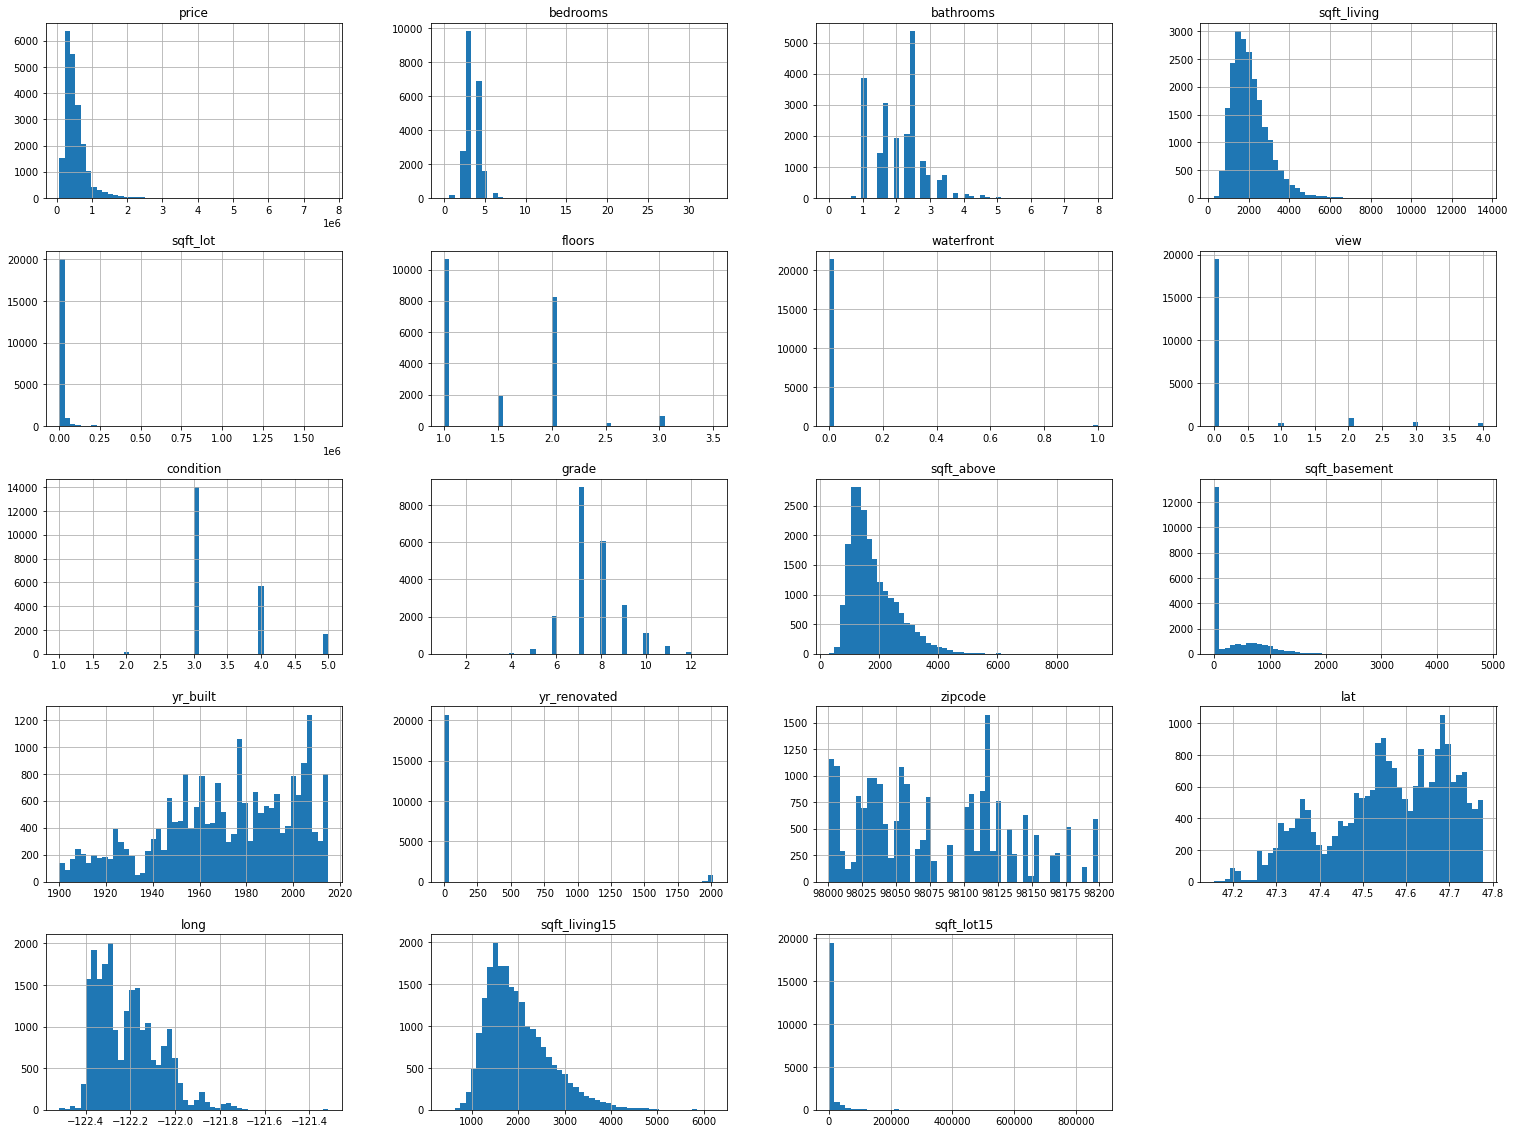

In [ ]:
fig = data.drop(['id'],axis=1).hist(bins=50, figsize=(26, 20))

Verideki en yüksek ve en düşük satış fiyatlı evlerin fiyatları nedir? Ortalama ev satış fiyatı nedir?

In [ ]:
fig = px.box(data.iloc[::,2:6].melt(), 
             y='value', 
             facet_col='variable', 
             color="variable",
             labels={'variable': 'feature'})

fig.update_yaxes(matches=None)

for i in range(len(fig["data"])):
    yaxis_name = 'yaxis' if i == 0 else f'yaxis{i + 1}'
    fig.layout[yaxis_name].showticklabels = True

fig.update_layout(
    title_text='Box Plot of Features',
    title_font_size=18,
    showlegend=False)

fig.show()

En yüksek satış değerine sahip evin fiyatı:

In [ ]:
data.sort_values(by='price').tail(1)['price']

7252    7700000
Name: price, dtype: int64

En düşük satış değerine sahip evin fiyatı:

In [ ]:
data.sort_values(by='price').head(1)['price']

1149    75000
Name: price, dtype: int64

Ortalama ev satış değeri:

In [ ]:
data['price'].mean()

540088.1419053348

Evlerin yaşam alanı (sqft_living) ile fiyatları (price) arasında pozitif bir ilişki olduğu görülmektedir. Ayrıca evlerin inşaat ve tasarım seviyesi (grade) ile fiyatlarının artan bir ilişki içerisinde olduğu açıktır.

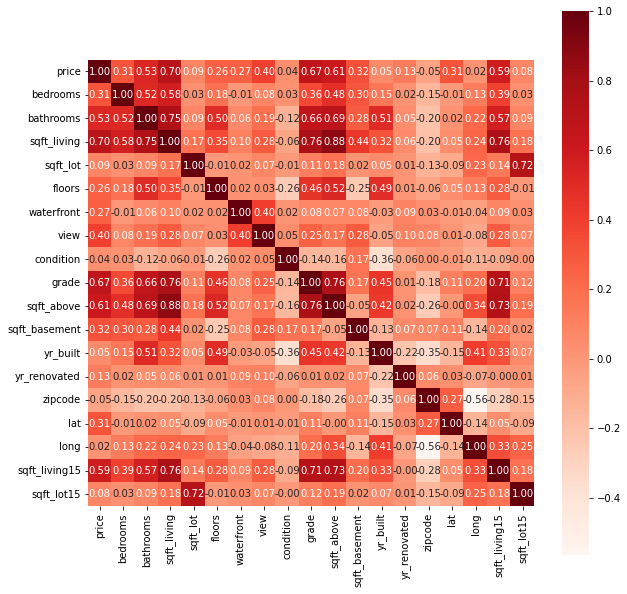

In [ ]:
plt.figure(figsize=(10,10))
fig = sns.heatmap(data.iloc[::,2::].corr(), annot = True, square = True, fmt='.2f', cmap='Reds')


In [ ]:
fig = px.scatter(data, x='sqft_living', 
                 y='price', 
                 opacity=0.65,
                 trendline='ols',
                 trendline_color_override='darkblue')
fig.update_layout(
    title="",
    title_font_size=18,
    width=600,
    height=500)
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



En yüksek ortalama satış fiyatına sahip bölgeyi (posta kodu) bulalım. Bu posta koduna sahip evlerin ortalama satış fiyatı nedir?

In [ ]:
zip_prices = dict()
zip_codes = data['zipcode'].unique()
for zipcode in zip_codes:
    prices = data[data['zipcode']==zipcode]['price'].to_numpy()
    zip_prices[zipcode] = prices.mean()

In [ ]:
maxprice_zipcode = max(zip_prices, key=zip_prices.get)
print('Zip Code: ', maxprice_zipcode, '\nAverage price: ', zip_prices[maxprice_zipcode])

Zip Code:  98039 
Average price:  2160606.6


Tüm evlerin yüzde %42.28'si ‘sqft_living’ özniteliğine göre 2000 sqft’ten büyük ve 4000 sqft’ten küçük olan evlerdir.

In [ ]:
len(data[(data['sqft_living'] > 2000) & (data['sqft_living'] < 4000)]['id'].unique())/len(data['id'].unique())

0.4228400821048703

<a name="cell-id1.2"></a>
### **2.2** Train/Test Split

Verinin %80'i modeli eğitmek için kullanılırken, %20'si ondan oluşturulan modeli test etmek için kullanılmak üzere bölünür.

In [ ]:
seed = 0 # The “seed” is a starting point for the sequence and the guarantee is that if you start from the same seed you will get the same sequence of numbers.

X = data['sqft_living']
y = data['price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

x_train = x_train.to_numpy().reshape(-1, 1)
x_test = x_test.to_numpy().reshape(-1, 1)

####**Neden yüksek korelasyona sahip verileri ayıklamalıyız?**



Regresyon tamamen eğitim verilerinden ağırlık vektörünü öğrenmek ve tahmin yapmak için kullanmakla ilgilidir. Ağırlık vektörünü elde etmek için gerekli formül aşağıda gösterilmiştir.

<div>
<img src="https://miro.medium.com/max/424/1*HHcgT3vxC66qpDYVdjPzQQ.png" width="200"/>
</div>

Bağımlı değişken “y”nin normal olarak varyans σ² ile dağıldığı varsayıldığında, olasılıksal bir regresyon görüşüne sahibiz. Bu varsayım altında, yukarıdaki ağırlık vektörü Wₗₛ'nin varyansının matematiksel olarak gösterilebilir.

<div>
<img src="https://miro.medium.com/max/149/1*h6KutxF-aDXedF8V5rQpmA.png" width="100"/>
</div>

Modelin yeterince kararlı olması için yukarıdaki varyansın düşük olması gerekir. Ağırlıkların varyansının yüksek olması modelin verilere çok duyarlı olduğu anlamına gelir. Varyans yüksekse ağırlıklar eğitim verileriyle büyük ölçüde farklılık gösterir. Bu, modelin test verileriyle iyi performans göstermeyebileceği anlamına gelir. Yani, şimdi doğal soru şu olurdu:
Wₗₛ'nin varyansı ne zaman büyük olacak?
Şimdi, yüksek oranda ilişkili özelliklere sahip olduğumuzda, Wₗₛ'nin varyansının büyük olacağını tahmin etmiş olmalısınız. Evet, tahmin doğru!! Ama bunun matematiksel olarak nasıl doğru olduğunu görelim. Herhangi bir nxd matrisi şu şekilde ayrıştırılabilir:

<div>
<img src="https://miro.medium.com/max/139/1*pjnfR1DPa_mAkJZe3XtGvg.png" width="100"/>
</div>

Yukarıdaki ayrıştırmaya “Tekil Değer Ayrışımı” denir. Yukarıdaki denklemdeki “S” matrisi negatif olmayan bir köşegen matristir. Bu ayrıştırma kullanılarak, Wₗₛ'nin varyansı şu şekilde yeniden yazılabilir:

<div>
<img src="https://miro.medium.com/max/469/1*YbO_1ZymvlFFa_TDzAKaoA.png" width="300"/>
</div>

Veri setinde yüksek korelasyonlu özelliklere sahip olduğumuzda, “S” matrisindeki değerler küçük olacaktır. Böylece “S” matrisinin ters karesi (yukarıdaki denklemde S^-2) büyük olacak ve bu da Wₗₛ'nin varyansını büyük kılacaktır.
Bu nedenle, iki özellik yüksek oranda ilişkiliyse veri kümesinde yalnızca bir özelliği tutmamız önerilir.

In [ ]:
# En yüksek mutlak 5 korelasyonu sıralayalım
features = data.drop(['id', 'date', 'price'], axis=1)
for col in features.columns:
    top_5_corr = abs(features.corr()[col]).nlargest(n=5) # en yüksek korelasyona sahip 5 değeri alalım
    # eğer 0.75'ten büyük değer varsa yazdır.
    for index, value in top_5_corr.items():
        if 1> value >= 0.75:
            print('*', index, " vs ", col, "-> değişkenleri yüksek korelasyona sahip: ", value)

* sqft_living  vs  bathrooms -> değişkenleri yüksek korelasyona sahip:  0.7546652789673779
* sqft_above  vs  sqft_living -> değişkenleri yüksek korelasyona sahip:  0.8765965986813212
* grade  vs  sqft_living -> değişkenleri yüksek korelasyona sahip:  0.7627044764584873
* sqft_living15  vs  sqft_living -> değişkenleri yüksek korelasyona sahip:  0.7564202590172227
* bathrooms  vs  sqft_living -> değişkenleri yüksek korelasyona sahip:  0.7546652789673779
* sqft_living  vs  grade -> değişkenleri yüksek korelasyona sahip:  0.7627044764584873
* sqft_above  vs  grade -> değişkenleri yüksek korelasyona sahip:  0.7559229376236656
* sqft_living  vs  sqft_above -> değişkenleri yüksek korelasyona sahip:  0.8765965986813212
* grade  vs  sqft_above -> değişkenleri yüksek korelasyona sahip:  0.7559229376236656
* sqft_living  vs  sqft_living15 -> değişkenleri yüksek korelasyona sahip:  0.7564202590172227


<a name="cell-id1.3"></a>
### **2.3** Normalization

Veri içerisindeki özniteliklerin model eğitiminde birbirlerine baskın gelmemesi açısından değerler 0 ile 1 arasına normalize edilir.


Öncelikle verileri eğitim ve test kümesine bölmeniz gerekir (doğrulama kümesi de yararlı olabilir). Test veri noktalarının gerçek dünyadaki verileri temsil ettiğini unutmayın. Açıklayıcı (veya tahmin edici) değişkenlerin özellik normalleştirmesi (veya veri standardizasyonu), ortalamayı çıkararak ve varyansa bölerek verileri ortalamalamak ve normalleştirmek için kullanılan bir tekniktir.

Herhangi bir veri normalizasyonu uygulamadan önce, ilk veri setimizi eğitim ve test setlerine ayırmamız gerektiğini belirtmek önemlidir . Test veri noktalarının gerçek dünya verilerini temsil ettiğini unutmayın.
Daha önce de belirtildiği gibi, verilerimizi standartlaştırırken ortalama ve standart sapma dikkate alınır. Tüm veri setinin ortalamasını ve varyansını alırsak, eğitim açıklayıcı değişkenlerine gelecekteki bilgileri sunacağız. Bu nedenle, eğitim verileri üzerinde özellik ölçeklendirmesi yapmalı ve ardından test örneklerinde de normalleştirme yapmalıyız, ancak bu sefer eğitim açıklayıcı değişkenlerinin ortalama ve standart sapmasını kullanarak. Bu şekilde, modelimizin yeni, görünmeyen veri noktalarına genelleme yapıp yapamayacağını test edebilir ve değerlendirebiliriz.


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#advanced_scaler = StandardScaler()
#x_train_advanced = advanced_scaler.fit_transform(x_train_advanced)
#x_test_advanced = advanced_scaler.transform(x_test_advanced)

<a name="cell-id2"></a>
## **3.** Regression

Regresyon eğrisi temsil ettiği noktalara olabildiğince en yakından geçmeye çalışır. Bunun için her bir noktanın eğriye olan uzaklığı hesaplanır ve toplam mesafeyi en küçük kılan doğru regresyon doğrusu olarak seçilir.

<div>
<img src="https://www.veribilimiokulu.com/wp-content/uploads/2017/07/Regreyon_Dogrusu_R_kare.png" width="300"/>
</div>

Yukarıda meslek erbabı örnek verisi için kazanç ve tecrübe arasındaki ilişkiyi gösteren bir grafik bulunuyor. Bu grafiğe göre tecrübe arttıkça kazanç da artmaktadır. Grafiğe bakarak doğrusal regresyon formülü şu şekilde yazılabilir:

Kazanç = Sabit + β x Tecrübe

Eğer bağımsız değişkenler birden fazla olursa bu kez çoklu regresyon modeli kurmamız gerekir. Basit lineer regresyonda olduğu gibi katsayılar ve kesme terimi bulunduktan sonra regresyon modeli kurulabilir. Çoklu regresyonda modele alınacak değişkenlerin seçilmesi en önemli aşamayı oluşturur.


In [ ]:
reg = LinearRegression()
lr = reg.fit(x_train, y_train)

Genel regresyon denklemi aşağıda gösterilmiştir.

$Y\ =\ \beta_0+\ \beta_1\ x_1+\ \beta_2\ x_2+\ \ldots\ +\ \beta_n\ x_n$

Bu denklemde $Y$ değişkeni hedef değişkeni $X$ değişkenleri ise özellik/öznitelik değişkenlerini göstermektedir. $\beta$ katsayıları sklearn içerisinde `coef_`, $\beta_0$ ise `intercept_` olarak kaydedilir. Lineer regresyon analizinde 2 boyutlu düzlemde çalışıyorsak yani bir çıktı bir de öznitelik değişkenimiz varsa 2 değişkeni temsil eden en iyi çizgiyi çizmeye çalışırız. 

**Lineer Regresyon**: Bağımlı bir değişken($Y$) ile bağımsız bir değişken ($X$) serisinin arasındaki ilişkinin fonksiyonel biçimidir.  

**Lineer regresyon analizi**: «veriyi lineer bir çizgiye uydurma çalışmasına denir» veya «lineer modelleme» olarak da adlandırılır. 

<div>
<img src="https://miro.medium.com/max/875/1*GpFUY86SL1zrXkruEOQKuQ.png" width="390"/>
</div>

Yukarıdaki resim elde edilen denklemin fiziksel yorumunun daha iyi anlaşılması için verilmiştir.


In [ ]:
lr.coef_

array([262164.84852137])

In [ ]:
lr.intercept_

542799.8383458647

Elde edilen regresyon modeline bakalım:

$Y\ =\ \beta_0+\ \beta_1\ x_1$

In [ ]:
print("Elde edilen regresyon modeli: Y={:.2f} + {:.2f}x".format(lr.intercept_, lr.coef_[0]))

Elde edilen regresyon modeli: Y=542799.84 + 262164.85x


${\displaystyle R^{2}}$ **Score**

${\displaystyle {\bar {y}}={\frac {1}{n}}\sum _{i=1}^{n}y_{i}}$

${\displaystyle SS_{\text{tot}}=\sum _{i}(y_{i}-{\bar {y}})^{2}}$

${\displaystyle SS_{\text{res}}=\sum _{i}(y_{i}-f_{i})^{2}=\sum _{i}e_{i}^{2}}$

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/86/Coefficient_of_Determination.svg/1920px-Coefficient_of_Determination.svg.png" width="350"/>
</div>

Doğrusal regresyon (sağda), basit ortalamaya (soldaki grafikte) kıyasla verilere ne kadar iyi uyarsa, ${\displaystyle R^{2}}$ değeri 1'e o kadar yakın olur. Mavi karelerin alanları, doğrusal regresyona göre kare artıkları (residual) temsil eder. Kırmızı karelerin alanları, ortalama değere göre kare artıkları (residual) temsil eder.

${\displaystyle R^{2}=1-{\frac {\color {blue}{SS_{\text{res}}}}{\color {red}{SS_{\text{tot}}}}}}$

Regresyon iyilik uyum indeksi (goodness of fit) olarak ${\displaystyle R^{2}}$  kullanıldığında artıkların toplam karesi ne kadar düşük olursa uyum o kadar yüksek olmaktadır. Ancak bağımsız değişken sayısı arttıkça payda düşmeye devam edecektir. Böylelikle ${\displaystyle R^{2}}$ düşmeyecek ve ne kadar çok değişken modele katılırsa o kadar yüksek bir uyum ortaya çıkacaktır. Fakat teorikte görülen gerçekte de öyle midir? Model karmaşıklığını azaltmak ve anlaşılabilir, yorumlanabilir (interpretable) modeller oluşturmak için hedef değişkene etkisi olmayan, az olan, etkisi ihmal edilebilen değişkenler modele dahil edilmez. Bu sebeple iyilik uyum indeksi kullanırken düzeltilmiş ${\displaystyle R^{2}}$ kullanılmaktadır. Düzeltilmiş ${\displaystyle R^{2}}$ gereksiz eklenen bağımsız değişkenleri cezalandırır. 
Düzeltilmiş ${\displaystyle R^{2}}$ aşağıda gösterilmiştir;

${\displaystyle {\bar {R}}^{2}=1-(1-R^{2}){n-1 \over n-p-1}}$

(p: bağımsız değişken sayısı, n: örneklem büyüklüğü)

Model başarım ölçümleri için kullanabileceğimiz diğer ölçütler:
1. **Mean Absolute Error(MAE): Ortalama Mutlak Hata**

> Ortalama mutlak hata iki sürekli değişken arasındaki farkın ölçüsüdür. MAE, her gerçek değer ile veriye en iyi uyan çizgi arasındaki ortalama dikey mesafedir. MAE aynı zamanda her veri noktası ile en iyi uyan çizgi arasındaki ortalama yatay mesafedir.


$MAE = 1/n\times\sum{|y-y_{tahmin}|}$

2. **Mean squared error(MSE) Ortalama Karesel Hata**

> Basitçe, ortalama kare hata bir regresyon eğrisinin bir dizi noktaya ne kadar yakın olduğunu söyler. MSE, bir makine öğrenmesi modelinin, tahminleyicinin performansını ölçer, her zaman pozitif değerlidir.

$MSE = 1/n\times\sum{(y-y_{tahmin})^2}$

3. **Root Mean Squared Error (RMSE): Ortalama Karesel Hataların Karekökü**

> RMSE tahmin hatalarının (kalıntıların) standart sapmasıdır. Yani, kalıntılar, regresyon hattının veri noktalarından ne kadar uzakta olduğunun bir ölçüsüdür; RMSE ise bu kalıntıların ne kadar yayıldığının bir ölçüsüdür. Başka bir deyişle, verilere en iyi uyan çizgi etrafında o verilerin ne kadar yoğun olduğunu söyler.

$RMSE = \sqrt{1/n\times\sum{(y-y_{tahmin})^2}}$

In [ ]:
y_pred = lr.predict(x_test)
print('R2-Score: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', mean_squared_error(y_test, y_pred, squared=False))

R2-Score:  0.47915770799654944
MAE:  170780.92662084647
MSE:  61940787221.49824
RMSE:  248879.06143647005


###Linear Regression From Scratch

In [ ]:
# Copyright https://github.com/eriklindernoren/ML-From-Scratch

class l1_regularization():
    """ Regularization for Lasso Regression """
    def __init__(self, alpha):
        self.alpha = alpha
    
    def __call__(self, w):
        return self.alpha * np.linalg.norm(w)

    def grad(self, w):
        return self.alpha * np.sign(w)

class l2_regularization():
    """ Regularization for Ridge Regression """
    def __init__(self, alpha):
        self.alpha = alpha
    
    def __call__(self, w):
        return self.alpha * 0.5 *  w.T.dot(w)

    def grad(self, w):
        return self.alpha * w

class l1_l2_regularization():
    """ Regularization for Elastic Net Regression """
    def __init__(self, alpha, l1_ratio=0.5):
        self.alpha = alpha
        self.l1_ratio = l1_ratio

    def __call__(self, w):
        l1_contr = self.l1_ratio * np.linalg.norm(w)
        l2_contr = (1 - self.l1_ratio) * 0.5 * w.T.dot(w) 
        return self.alpha * (l1_contr + l2_contr)

    def grad(self, w):
        l1_contr = self.l1_ratio * np.sign(w)
        l2_contr = (1 - self.l1_ratio) * w
        return self.alpha * (l1_contr + l2_contr) 

class Regression(object):
    """ Base regression model. Models the relationship between a scalar dependent variable y and the independent 
    variables X. 
    Parameters:
    -----------
    n_iterations: float
        The number of training iterations the algorithm will tune the weights for.
    learning_rate: float
        The step length that will be used when updating the weights.
    """
    def __init__(self, n_iterations, learning_rate):
        self.n_iterations = n_iterations
        self.learning_rate = learning_rate

    def initialize_weights(self, n_features):
        """ Initialize weights randomly [-1/N, 1/N] """
        limit = 1 / math.sqrt(n_features)
        self.w = np.random.uniform(-limit, limit, (n_features, ))

    def fit(self, X, y, verbose=False):
        # Insert constant ones for bias weights
        X = np.insert(X, 0, 1, axis=1)
        self.training_errors = []
        self.initialize_weights(n_features=X.shape[1])

        # Do gradient descent for n_iterations
        for i in range(self.n_iterations):
            y_pred = X.dot(self.w)
            # Calculate l2 loss
            mse = np.mean(0.5 * (y - y_pred)**2 + self.regularization(self.w))
            rmse = mean_squared_error(y, y_pred, squared=False)
            if verbose:
                print('For epoch {} -> MSE: {}, RMSE: {}'.format(i+1, mse, rmse))
            self.training_errors.append(mse)
            # Gradient of l2 loss w.r.t w
            grad_w = -(y - y_pred).dot(X) + self.regularization.grad(self.w)
            # Update the weights
            self.w -= self.learning_rate * grad_w

    def predict(self, X):
        # Insert constant ones for bias weights
        X = np.insert(X, 0, 1, axis=1)
        y_pred = X.dot(self.w)
        return y_pred

class LinearRegression(Regression):
    """Linear model.
    Parameters:
    -----------
    n_iterations: float
        The number of training iterations the algorithm will tune the weights for.
    learning_rate: float
        The step length that will be used when updating the weights.
    gradient_descent: boolean
        True or false depending if gradient descent should be used when training. If 
        false then we use batch optimization by least squares.
    """
    def __init__(self, n_iterations=100, learning_rate=0.001, gradient_descent=True):
        self.gradient_descent = gradient_descent
        # No regularization
        self.regularization = lambda x: 0
        self.regularization.grad = lambda x: 0
        super(LinearRegression, self).__init__(n_iterations=n_iterations,
                                            learning_rate=learning_rate)
    def fit(self, X, y, verbose=False):
        # If not gradient descent => Least squares approximation of w
        if not self.gradient_descent:
            # Insert constant ones for bias weights
            X = np.insert(X, 0, 1, axis=1)
            # Calculate weights by least squares (using Moore-Penrose pseudoinverse)
            U, S, V = np.linalg.svd(X.T.dot(X))
            S = np.diag(S)
            X_sq_reg_inv = V.dot(np.linalg.pinv(S)).dot(U.T)
            self.w = X_sq_reg_inv.dot(X.T).dot(y)
        else:
            super(LinearRegression, self).fit(X, y, verbose=verbose)



In [ ]:
lr_scratch = LinearRegression()
lr_scratch.fit(x_train, y_train, verbose=True)

In [ ]:
y_pred = lr_scratch.predict(x_test)
print('R2-Score: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', mean_squared_error(y_test, y_pred, squared=False))

R2-Score:  0.47915770799654933
MAE:  170780.92662084653
MSE:  61940787221.49825
RMSE:  248879.0614364701


In [ ]:
def plot_actualvspredicted(y_test, y_pred):
    fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'Actual', 'y': 'Prediction'})
    fig.add_shape(
        type="line", line=dict(dash='dash'),
        x0=y_test.min(), y0=y_test.min(),
        x1=y_test.max(), y1=y_test.max())
    fig.update_layout(
        title='Simple actual vs predicted',
        title_font_size=18,
        width=600,
        height=500)
    fig.show()

In [ ]:
plot_actualvspredicted(y_test, y_pred)

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(name='sqft_living vs price', 
                         x=x_test.squeeze(), y=y_test, 
                         mode='markers',
                         opacity=0.75))
fig.add_trace(go.Scatter(name='Regression Fit', 
                         x=x_test.squeeze(), y=y_pred, 
                         mode='lines'))
fig.add_annotation(x=x_test.max()-5000,
                  y=y_test.max()-500000,
                  text='$R^2 = {:.2f}, \\Y={:.2f} + {:.2f}x$'.format(r2_score(y_test, y_pred), lr.intercept_, lr.coef_[0]),
                  showarrow=False)
fig.update_layout(
        title='Square feet living vs Price',
        title_font_size=18,
        xaxis_title='sqft_living',
        yaxis_title="price",
        width=700,
        height=500)
fig.show()

Veride bulunan her bir öznitelik ile basit regresyon modelini tekrar oluşturalım.



```
advanced_features=['bedrooms', 'bathrooms', 
                   'sqft_living', 'sqft_lot',
                   'floors', 'zipcode', 
                   'condition', 'grade', 
                   'waterfront', 'view', 
                   'sqft_above', 'sqft_basement', 
                   'yr_built', 'yr_renovated',
                   'lat', 'long',
                   'sqft_living15', 'sqft_lot15']
```



In [ ]:
# Advanced features train/test split

X_advanced = data.drop(['id', 'date', 'price'], axis=1)
y_advanced = data['price']

x_train_advanced, x_test_advanced, y_train_advanced, y_test_advanced = train_test_split(X_advanced, y_advanced, test_size=0.2, random_state=seed)

x_train_advanced = scaler.fit_transform(x_train_advanced)
x_test_advanced = scaler.transform(x_test_advanced)

advanced_lr = reg.fit(x_train_advanced, y_train_advanced)

In [ ]:
y_pred_advancedlr = advanced_lr.predict(x_test_advanced)
print('R2-Score: ', r2_score(y_test_advanced, y_pred_advancedlr))
print('MAE: ', mean_absolute_error(y_test_advanced, y_pred_advancedlr))
print('MSE: ', mean_squared_error(y_test_advanced, y_pred_advancedlr))
print('RMSE: ', mean_squared_error(y_test_advanced, y_pred_advancedlr, squared=False))

R2-Score:  0.6949310001418016
MAE:  122187.77661401496
MSE:  36280106854.239
RMSE:  190473.37570967496


Her iki modelde orjinal eğitim kümesinde eğitildi. Daha fazla öznitelik kullanılarak eğitilen model için RMSE değeri -> 190473.38 iken sadece sqft_living özniteliğine göre eğitilen modelin RMSE değeri -> 248879.06 çok daha büyük olarak ölçüldü. Aradaki fark 58405.68 şeklinde olup azımsanmayacak derecededir.

In [ ]:
colors = ['Positive' if c > 0 else 'Negative' for c in advanced_lr.coef_]

fig = px.bar(
    x=X_advanced.columns, y=advanced_lr.coef_, color=colors,
    color_discrete_sequence=['red', 'green'],
    labels=dict(x='Feature', y='Linear coefficient'),
    title='Weight of each feature for predicting price'
)
fig.update_layout(
    title_font_size=18,
    width=600,
    height=500)
fig.show()


<a name="cell-id2.1"></a>
###**3.1** Polynomial Regression



<div>
<img src="https://i1.wp.com/thaddeus-segura.com/wp-content/uploads/2020/09/equations.png?resize=768%2C358&ssl=1" width="400"/>
</div>

Quadratic (degree=2) Polynomial Regression

In [ ]:
#quadratic 'sqft_living'

quadratic = PolynomialFeatures(degree=2)
x_train_poly = quadratic.fit_transform(x_train)
x_test_poly = quadratic.transform(x_test)


pol_reg = LinearRegression()
quadratic_reg = pol_reg.fit(x_train_poly, y_train)

In [ ]:
y_pred_quadratic = quadratic_reg.predict(x_test_poly)
print('R2-Score: ', r2_score(y_test, y_pred_quadratic))
print('MAE: ', mean_absolute_error(y_test, y_pred_quadratic))
print('MSE: ', mean_squared_error(y_test, y_pred_quadratic))
print('RMSE: ', mean_squared_error(y_test, y_pred_quadratic, squared=False))

R2-Score:  0.5145595930277586
MAE:  163442.49067570263
MSE:  57730644033.003975
RMSE:  240272.02091172407


In [ ]:
#quadratic-advanced

x_train_poly = quadratic.fit_transform(x_train_advanced)
x_test_poly = quadratic.transform(x_test_advanced)

pol_reg = LinearRegression()
quadratic_regadvanced = pol_reg.fit(x_train_poly, y_train_advanced)

In [ ]:
y_pred_quadraticadvanced = quadratic_regadvanced.predict(x_test_poly)
print('R2-Score: ', r2_score(y_test_advanced, y_pred_quadraticadvanced))
print('MAE: ', mean_absolute_error(y_test_advanced, y_pred_quadraticadvanced))
print('MSE: ', mean_squared_error(y_test_advanced, y_pred_quadraticadvanced))
print('RMSE: ', mean_squared_error(y_test_advanced, y_pred_quadraticadvanced, squared=False))

R2-Score:  0.8046756101657955
MAE:  97380.50432822981
MSE:  23228809671.641026
RMSE:  152410.00515596417


Quintic (degree=5) Polynomial Regression

In [ ]:
#quintic 'sqft_living'

quintic = PolynomialFeatures(degree=5)
x_train_poly = quintic.fit_transform(x_train)
x_test_poly = quintic.transform(x_test)

pol_reg = LinearRegression()
quintic_reg = pol_reg.fit(x_train_poly, y_train)

In [ ]:
y_pred_quintic = quintic_reg.predict(x_test_poly)
print('R2-Score: ', r2_score(y_test, y_pred_quintic))
print('MAE: ', mean_absolute_error(y_test, y_pred_quintic))
print('MSE: ', mean_squared_error(y_test, y_pred_quintic))
print('RMSE: ', mean_squared_error(y_test, y_pred_quintic, squared=False))

R2-Score:  0.5107557244233774
MAE:  163466.03121870226
MSE:  58183016314.32584
RMSE:  241211.55924691056


Memory Allocation Problem

In [ ]:
#quintic-advanced
x_train_poly = quintic.fit_transform(x_train_advanced)
x_test_poly = quintic.transform(x_test_advanced)

pol_reg = LinearRegression()
quintic_regadvanced = pol_reg.fit(x_train_poly, y_train_advanced)

In [ ]:
y_pred_quinticadvanced = quintic_reg.predict(x_test)
print('R2-Score: ', r2_score(y_test, y_pred_quinticadvanced))
print('MAE: ', mean_absolute_error(y_test, y_pred_quinticadvanced))
print('MSE: ', mean_squared_error(y_test, y_pred_quinticadvanced))
print('RMSE: ', mean_squared_error(y_test, y_pred_quinticadvanced, squared=False))

In [ ]:
def plot_prediction_comp(y_test, y_pred):    
    fig = go.Figure()
    fig.add_trace(go.Scatter(y=np.array(y_test),
                        mode='lines+markers',
                        name='Real house price'))
    fig.add_trace(go.Scatter(y=y_pred,
                        mode='lines+markers',
                        name='Test split prediction'))

    fig.update_layout(
        title='Predictions Comparison (same split)',
        xaxis_title='Per house',
        yaxis_title='Price',
        title_font_size=18,
        width=800,
        height=540)
    fig.show()

plot_prediction_comp(y_test[:50], y_pred[:50])

Test kümesini (square feet vs. price) kapsayacak şekilde eğitilmiş modellerin regresyon eğrilerini çizdirelim.

In [ ]:
predictions = [y_pred, y_pred_advancedlr, y_pred_quadratic, y_pred_quadraticadvanced, y_pred_quintic]
degrees = ['Linear (d=1)', 
           'Linear (d=1) Advanced', 
           'Quadratic (d=2)', 
           'Quadratic (d=2) Advanced', 
           'Quintic (d=5)']

fig=go.Figure()
fig.add_trace(go.Scatter(name='sqft_living vs price', 
                         x=x_test.squeeze(), y=y_test, 
                         mode='markers',
                         opacity=0.55))

for index, prediction in enumerate(predictions):
    #equation = format_coefs(model.coef_.round(2))
    # sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x_test.squeeze(), prediction), key=sort_axis)
    x, y = zip(*sorted_zip)
    fig.add_traces(go.Scatter(x=x, y=y, name=degrees[index]))

fig.update_layout(
        title='All Regression Curves (same split)',
        xaxis_title='Sqft_living',
        yaxis_title='Price',
        title_font_size=18,
        width=800,
        height=540)
fig.show()

In [ ]:
X = x_train
y = y_train
regr = LinearRegression()

quadratic = PolynomialFeatures(degree=2)
quintic = PolynomialFeatures(degree=5)
X_quad = quadratic.fit_transform(X)
X_quintic = quintic.fit_transform(X)

X_fit = np.arange(X.min(),X.max(),1)[:,np.newaxis]
regr = regr.fit(X,y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y,regr.predict(X))

regr = regr.fit(X_quad,y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y,regr.predict(X_quad))

regr = regr.fit(X_quantic,y)
y_quantic_fit = regr.predict(quintic.fit_transform(X_fit))
quantic_r2 = r2_score(y,regr.predict(X_quantic))

fig=go.Figure()
fig.add_trace(go.Scatter(name='sqft_living vs price', 
                         x=X.squeeze(), y=y, 
                         mode='markers',
                         opacity=0.55))

fig.add_traces(go.Scatter(x=X_fit.squeeze(), y=y_lin_fit, name='linear (d=1)'))
fig.add_traces(go.Scatter(x=X_fit.squeeze(), y=y_quad_fit, name='quadratic (d=2)'))
fig.add_traces(go.Scatter(x=X_fit.squeeze(), y=y_quantic_fit, name='quintic (d=5)'))
fig.update_layout(
        title='All Regression Curves for Train Set',
        xaxis_title='Sqft_living',
        yaxis_title='Price',
        title_font_size=18,
        width=800,
        height=540)
fig.show()

Eğitilmiş modellerinizi kullanarak ID numaraları '5309101200' ve '1925069082' olan evlerin satış fiyatlarını tahmin edin. Bu evleri inceleyin: Evin alanı ne kadar, kaç odası var, vs? Bu evler için modellerinizin tahmini ne çıktı? Gerçek satış rakamı ile tahmin edilen rakam arasındaki fark ne kadar? Hangi modeli kullanmayı tercih ederdiniz? Neden?

In [ ]:
ID5309101200 = scaler.transform(data[data['id']==5309101200]['sqft_living'].to_numpy().reshape(-1, 1))
ID1925069082 = scaler.transform(data[data['id']==1925069082]['sqft_living'].to_numpy().reshape(-1, 1))
ID5309101200_advanced = advanced_scaler.transform(data[data['id']==5309101200].drop(['id', 'date', 'price'], axis=1))
ID1925069082_advanced = advanced_scaler.transform(data[data['id']==1925069082].drop(['id', 'date', 'price'], axis=1))

In [ ]:
data[data['id']==5309101200]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,2014-06-05,620000,4,2.25,2400,5350,1.5,0,0,4,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


In [ ]:
data[data['id']==1925069082]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,2015-05-11,2200000,5,4.25,4640,22703,2.0,1,4,5,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


In [ ]:
prediction = lr.predict(ID5309101200)
print('Model -> Linear Regression / ID=5309101200: ', prediction[-1])
print('Gerçek değer ile arasındaki fark: ', abs(data[data['id']==5309101200]['price'].values[-1] - prediction[-1]))
prediction = lr.predict(ID1925069082)
print('Model -> Linear Regression / ID=1925069082: ', prediction[-1])
print('Gerçek değer ile arasındaki fark: ', abs(data[data['id']==1925069082]['price'].values[-1] - prediction[-1]))

Model -> Linear Regression / ID=5309101200:  633267.4742274433
Gerçek değer ile arasındaki fark:  13267.474227443337
Model -> Linear Regression / ID=1925069082:  1269357.0427315822
Gerçek değer ile arasındaki fark:  930642.9572684178


In [ ]:
prediction = advanced_lr.predict(ID5309101200_advanced)
print('Model -> Advanced Features Linear Regression / ID=5309101200: ', prediction[-1])
print('Gerçek değer ile arasındaki fark: ', abs(data[data['id']==5309101200]['price'].values[-1] - prediction[-1]))
prediction = lr.predict(ID1925069082_advanced)
print('Model -> Advanced Features Linear Regression / ID=1925069082: ', prediction[-1])
print('Gerçek değer ile arasındaki fark: ', abs(data[data['id']==1925069082]['price'].values[-1] - prediction[-1]))

Model -> Advanced Features Linear Regression / ID=5309101200:  674400.8767341827
Gerçek değer ile arasındaki fark:  54400.876734182704
Model -> Advanced Features Linear Regression / ID=1925069082:  1984534.45106187
Gerçek değer ile arasındaki fark:  215465.54893813003


In [ ]:
prediction = quadratic_reg.predict(quadratic.transform(ID5309101200))
print('Model -> Quadratic Regression / ID=5309101200: ', prediction[-1])
print('Gerçek değer ile arasındaki fark: ', abs(data[data['id']==5309101200]['price'].values[-1] - prediction[-1]))
prediction = quadratic_reg.predict(quadratic.transform(ID1925069082))
print('Model -> Quadratic Regression / ID=1925069082: ', prediction[-1])
print('Gerçek değer ile arasındaki fark: ', abs(data[data['id']==1925069082]['price'].values[-1] - prediction[-1]))

Model -> Quadratic Regression / ID=5309101200:  587687.1410161552
Gerçek değer ile arasındaki fark:  32312.85898384475
Model -> Quadratic Regression / ID=1925069082:  1351666.4414584208
Gerçek değer ile arasındaki fark:  848333.5585415792


In [ ]:
prediction = quadratic_regadvanced.predict(quadratic.transform(ID5309101200_advanced))
print('Model -> Advanced Features Quadratic Regression / ID=5309101200: ', prediction[-1])
print('Gerçek değer ile arasındaki fark: ', abs(data[data['id']==5309101200]['price'].values[-1] - prediction[-1]))
prediction = quadratic_regadvanced.predict(quadratic.transform(ID1925069082_advanced))
print('Model -> Advanced Features Quadratic Regression / ID=1925069082: ', prediction[-1])
print('Gerçek değer ile arasındaki fark: ', abs(data[data['id']==1925069082]['price'].values[-1] - prediction[-1]))

Model -> Advanced Features Quadratic Regression / ID=5309101200:  579151.7001953125
Gerçek değer ile arasındaki fark:  40848.2998046875
Model -> Advanced Features Quadratic Regression / ID=1925069082:  2396885.373046875
Gerçek değer ile arasındaki fark:  196885.373046875


In [ ]:
prediction = quintic_reg.predict(quintic.transform(ID5309101200))
print('Model -> Quintic Regression / ID=5309101200: ', prediction[-1])
print('Gerçek değer ile arasındaki fark: ', abs(data[data['id']==5309101200]['price'].values[-1] - prediction[-1]))
prediction = quintic_reg.predict(quintic.transform(ID1925069082))
print('Model -> Quintic Regression / ID=1925069082: ', prediction[-1])
print('Gerçek değer ile arasındaki fark: ', abs(data[data['id']==1925069082]['price'].values[-1] - prediction[-1]))

Model -> Quintic Regression / ID=5309101200:  580111.6185928338
Gerçek değer ile arasındaki fark:  39888.38140716625
Model -> Quintic Regression / ID=1925069082:  1366130.4352441996
Gerçek değer ile arasındaki fark:  833869.5647558004


In [ ]:
prediction = quintic_regadvanced.predict(quintic.transform(ID5309101200_advanced))
print('Model -> Advanced Features Quintic Regression / ID=5309101200: ', prediction[-1])
print('Gerçek değer ile arasındaki fark: ', abs(data[data['id']==5309101200]['price'].values[-1] - prediction[-1]))
prediction = quintic_regadvanced.predict(quintic.transform(ID1925069082_advanced))
print('Model -> Advanced Features Quintic Regression / ID=1925069082: ', prediction[-1])
print('Gerçek değer ile arasındaki fark: ', abs(data[data['id']==1925069082]['price'].values[-1] - prediction[-1]))

<a name="cell-id3"></a>
#**Referanslar**


*   [Scikit-Learn](https://scikit-learn.org/stable/)
*   [Plotly](https://plotly.com/python/ml-regression/)
*   [Lineer Regression Tutorial](https://towardsdatascience.com/predicting-house-prices-with-linear-regression-machine-learning-from-scratch-part-ii-47a0238aeac1)
*   [Regression Tutorial](https://www.digitalvidya.com/blog/linear-regression/) 
*   [Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) 
*   [Trick for regression](https://towardsdatascience.com/why-exclude-highly-correlated-features-when-building-regression-model-34d77a90ea8e) 
*   [R2-score](https://www.veribilimiokulu.com/r-kare-ve-duzeltilmis-r-kare/)
*   [Residual analysis](https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-multiple-regression/mlr-residual-analysis-and-outliers.html)
*   [Regression Tutorial](https://medium.com/swlh/predictive-modelling-using-linear-regression-e0e399dc4745)
*   [Normalization](https://towardsdatascience.com/feature-scaling-and-normalisation-in-a-nutshell-5319af86f89b)

*   [Polynomial Regression](https://python.plainenglish.io/implementing-polynomial-regression-in-python-d9aedf520d56)

*   [Polynomial Regression-2](https://thaddeus-segura.com/poly-regression/)

*   [Basic Regression Notebook](https://www.kaggle.com/mukeshmanral/linear-regression-basic)

*   [Basic Multiple Feature Regression Notebook](https://www.kaggle.com/mukeshmanral/multiple-linear-regression-basic)

*   [Basic Polynomial Regression Notebook](https://www.kaggle.com/mukeshmanral/polynomial-regression-basic)

*   [KC-House Price Prediction](https://www.kaggle.com/vivekshivram/kc-house-prices-prediction)

*   [KC-House Data Notebook](https://www.kaggle.com/pasqua1/housedata)
*   [ML Special](https://towardsdatascience.com/super-simple-machine-learning-by-me-multiple-linear-regression-part-1-447800e8b624)
